# ÖDEV-7

### Ön hazırlık dosyasında verilen kodlar aşağıya yazılacak:

<IPython.core.display.Javascript object>


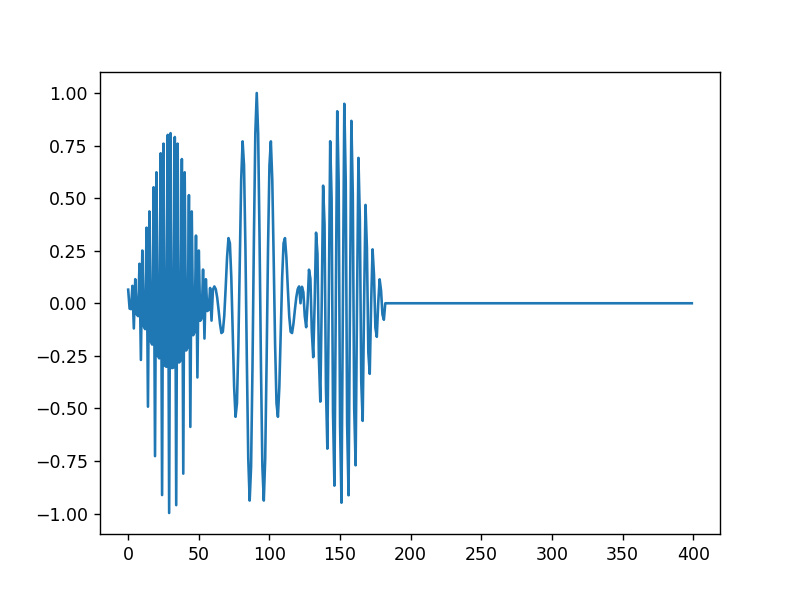

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sgnl
from scipy.fftpack import fft, ifft
%matplotlib notebook
import SystemFunction

N = 400
M = 60
n = np.arange(0,M+1,1)
wn = 0.54 - 0.46*np.cos(2*np.pi*n/M)

x1 = wn*np.cos(0.2*np.pi*n)
x2 = wn*np.cos(0.4*np.pi*n - np.pi/2)
x3 = wn*np.cos(0.8*np.pi*n - np.pi/5)

xn = np.concatenate((x3,x1,x2,np.zeros(N-3*len(n))), axis = None)

plt.figure()
plt.plot(xn)

<IPython.core.display.Javascript object>


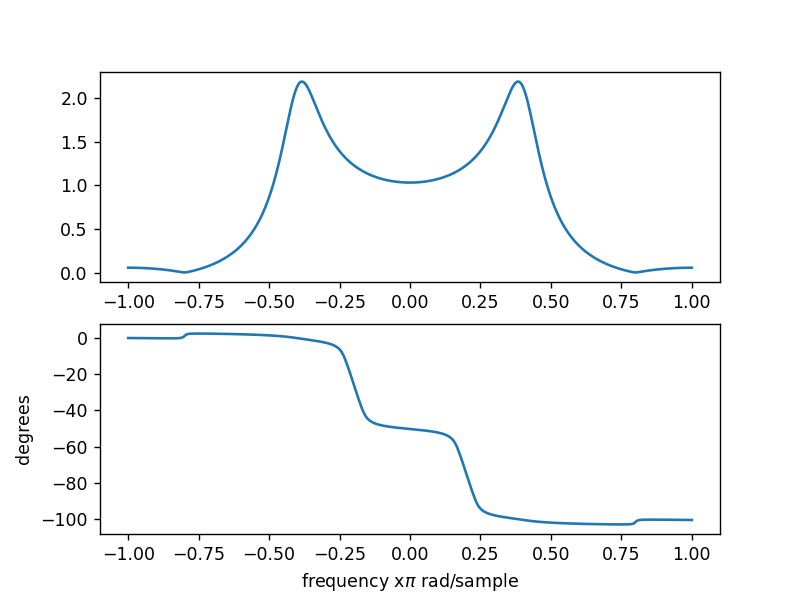

Text(0.5, 0, 'frequency x$\\pi$ rad/sample')

In [5]:
w = np.linspace(-np.pi, np.pi, N)
Xw = fft(xn)
Xw_shifted = np.fft.fftshift(Xw)

Hw, polezz, zerozz, K = SystemFunction.SystemFunction(w)

Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(w/np.pi, Hw_mag)
ax2.plot(w/np.pi, Hw_phs), plt.ylabel('degrees')
plt.xlabel('frequency x$\pi$ rad/sample')

<IPython.core.display.Javascript object>


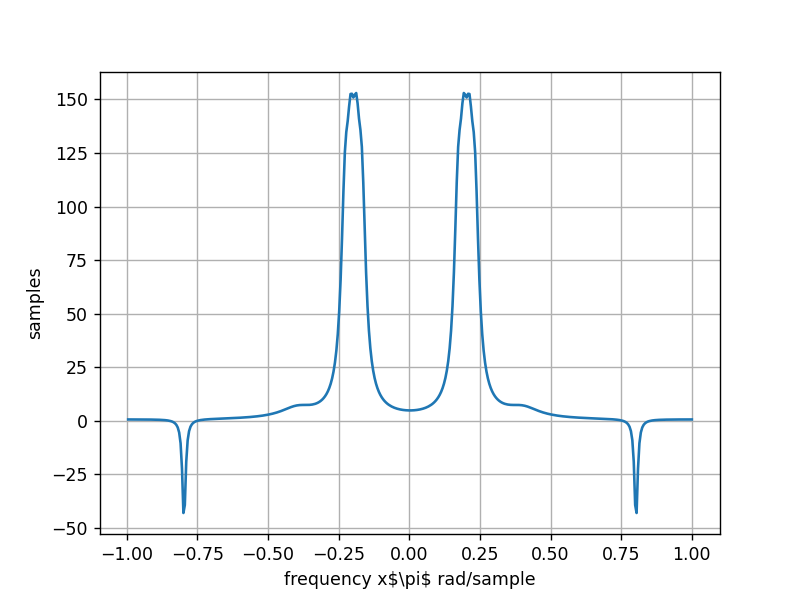

In [7]:
tau_w = -np.diff(Hw_phs)*(N/(2*np.pi))
plt.figure()
plt.plot(w[1::]/np.pi, tau_w)
plt.ylabel('samples'), plt.xlabel('frequency x$\pi\$ rad/sample')
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


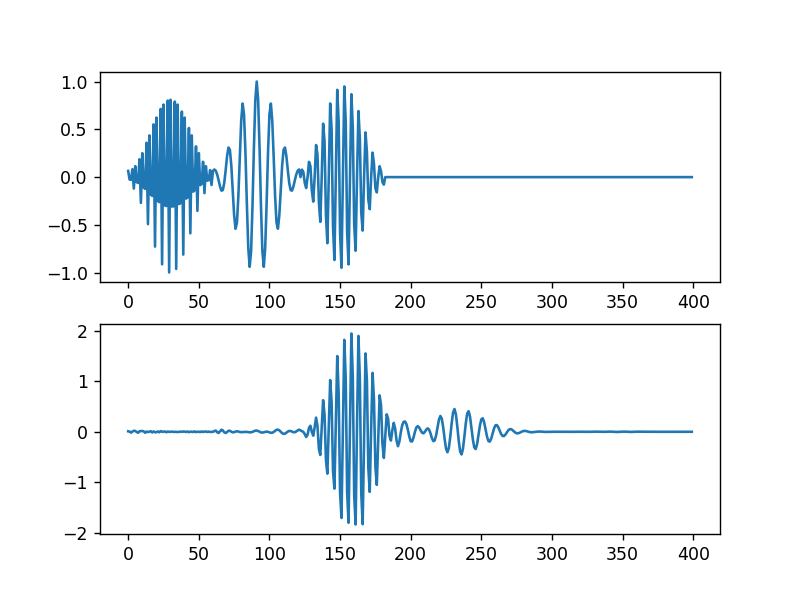

In [8]:
Yw_shifted = Hw * Xw_shifted
Yw = np.fft.ifftshift(Yw_shifted)
yn = np.real(ifft(Yw))

fig, (ax1,ax2) = plt.subplots(2)
ax1.plot(xn)
ax2.plot(yn)

<IPython.core.display.Javascript object>


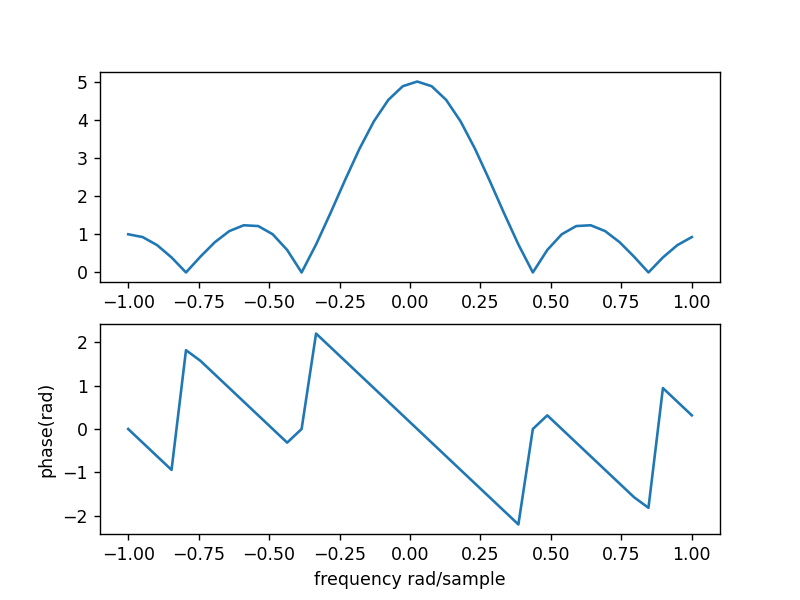

Text(0.5, 0, 'frequency rad/sample')

In [9]:
N = 40
hn = np.ones(5)
Hw = np.fft.fftshift(fft(hn,N))
w = np.linspace(-np.pi, np.pi, N)

Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))

fig, (ax1,ax2) = plt.subplots(2)
ax1.plot(w/np.pi, Hw_mag)
ax2.plot(w/np.pi, Hw_phs)
plt.ylabel('phase(rad)')
plt.xlabel('frequency rad/sample')

<IPython.core.display.Javascript object>


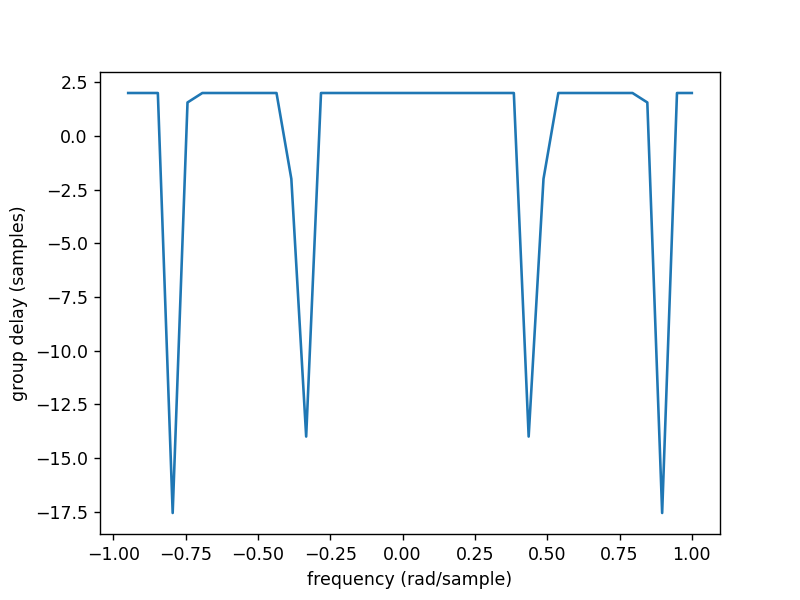

Text(0, 0.5, 'group delay (samples)')

In [10]:
tau_w = -np.diff(Hw_phs)*(N/(2*np.pi))

plt.figure()
plt.plot(w[1::]/np.pi, tau_w)
plt.xlabel('frequency (rad/sample)')
plt.ylabel('group delay (samples)')

<IPython.core.display.Javascript object>


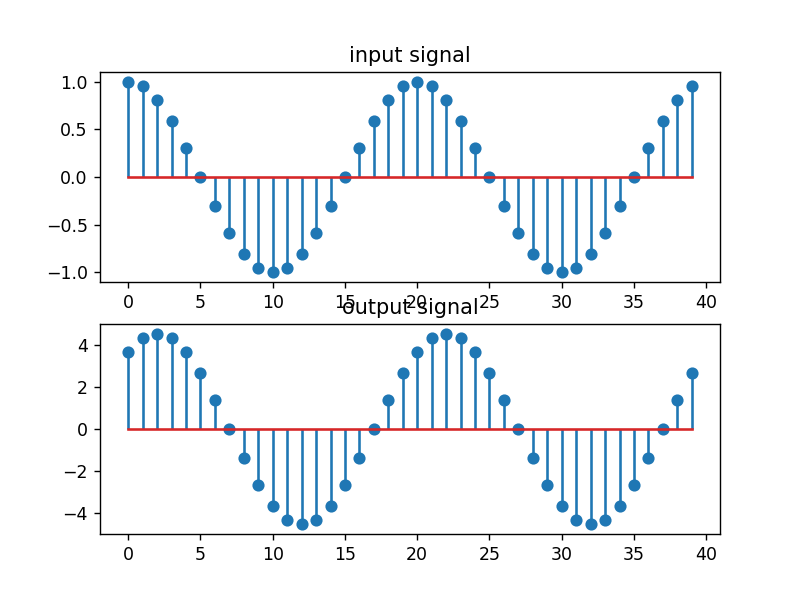

In [11]:
n = np.arange(0,N,1)
w0 = 0.1*np.pi
xn = np.cos(w0*n)

Xw = np.fft.fftshift(fft(xn,N))

Yw_shifted = Hw*Xw
Yw = np.fft.ifftshift(Yw_shifted)
yn = np.real(ifft(Yw))

fig, (ax1,ax2) = plt.subplots(2)
ax1.stem(n,xn)
ax1.title.set_text('input signal')
ax2.stem(n,yn)
ax2.title.set_text('output signal')

<IPython.core.display.Javascript object>


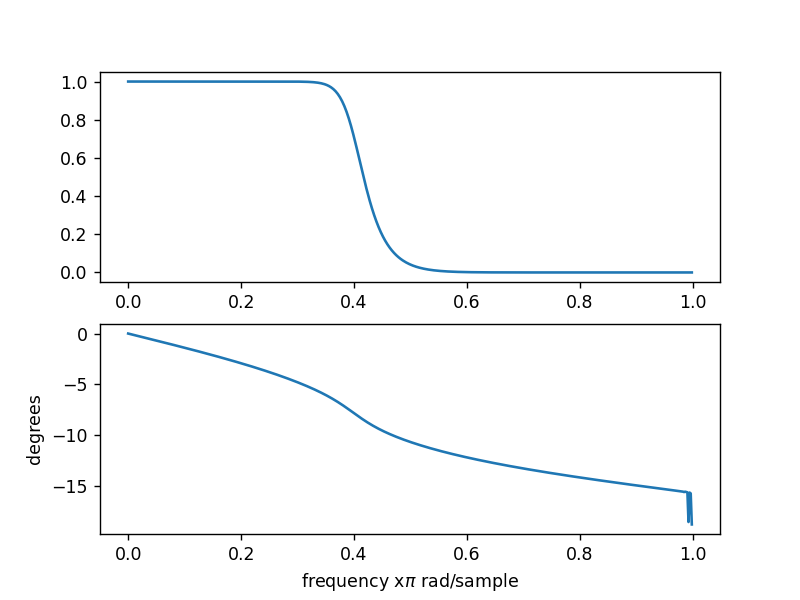

Text(0.5, 0, 'frequency x$\\pi$ rad/sample')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sgnl
from scipy.fftpack import fft,ifft
%matplotlib notebook
from scipy.io import loadmat

filter_data = loadmat('butterworth.mat')
Coeffs = filter_data['ba'].astype(float)

b = Coeffs[:,0]
a = Coeffs[:,1]

w,Hw = sgnl.freqz(b,a)

Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))

fig, (ax1,ax2) = plt.subplots(2)
ax1.plot(w/np.pi, Hw_mag)
ax2.plot(w/np.pi, Hw_phs)
plt.ylabel('degrees')
plt.xlabel('frequency x$\pi$ rad/sample')

<IPython.core.display.Javascript object>


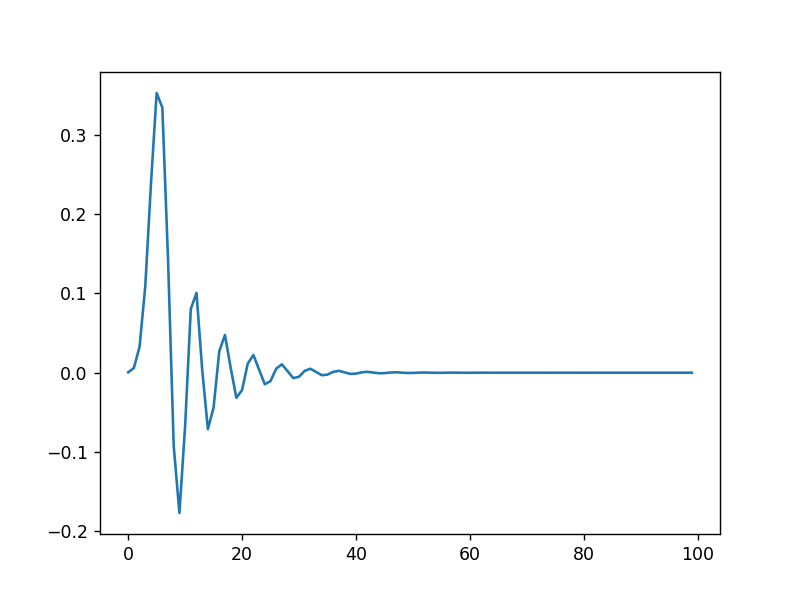

In [3]:
n,hn = sgnl.dimpulse((b,a,1),n=100)
plt.figure()
plt.plot(n, np.squeeze(hn))

<IPython.core.display.Javascript object>


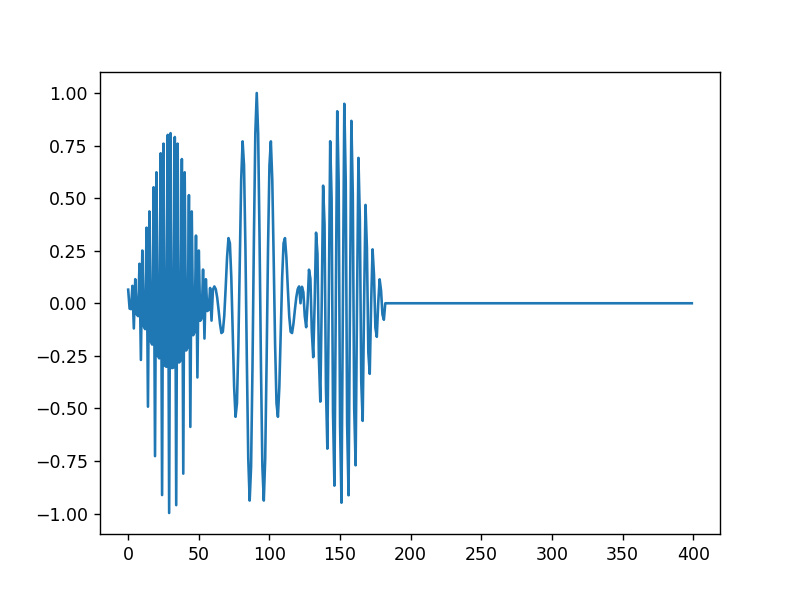

<IPython.core.display.Javascript object>


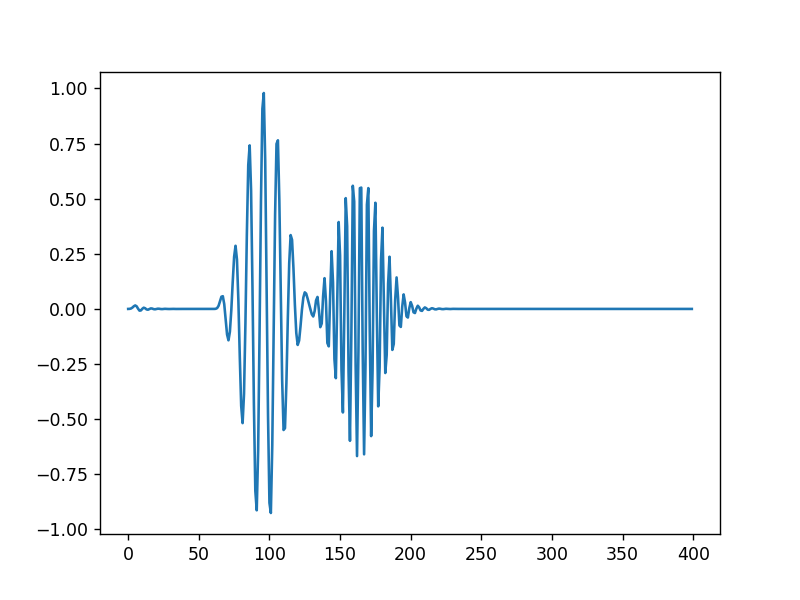

In [4]:
N = 400
M = 60

n1 = np.arange(0,M+1,1)
wn = 0.54 - 0.46*np.cos(2*np.pi*n1/M)

#the components
x1 = wn*np.cos(0.2*np.pi*n1)
x2 = wn*np.cos(0.4*np.pi*n1 - np.pi/2)
x3 = wn*np.cos(0.8*np.pi*n1 - np.pi/5)
xn = np.concatenate((x3,x1,x2,np.zeros(N-3*len(n1))), axis=None)

plt.figure()
plt.plot(xn)

yn = sgnl.lfilter(b, a, xn)

plt.figure()
plt.plot(yn)

## Ön hazırlık ödevleri (ÖDEV-7 başlığı altındaki soruların çözümleri aşağıda verilecek) 


## SORU-1

<IPython.core.display.Javascript object>


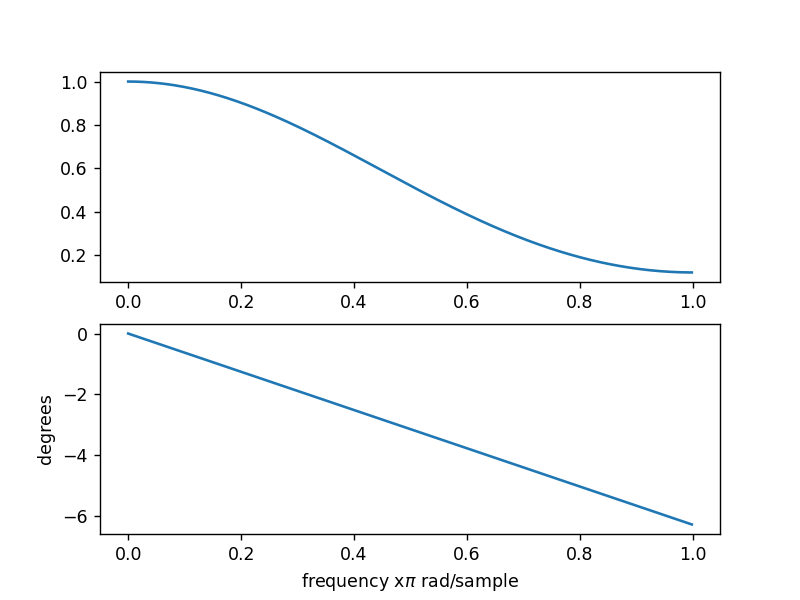

<IPython.core.display.Javascript object>


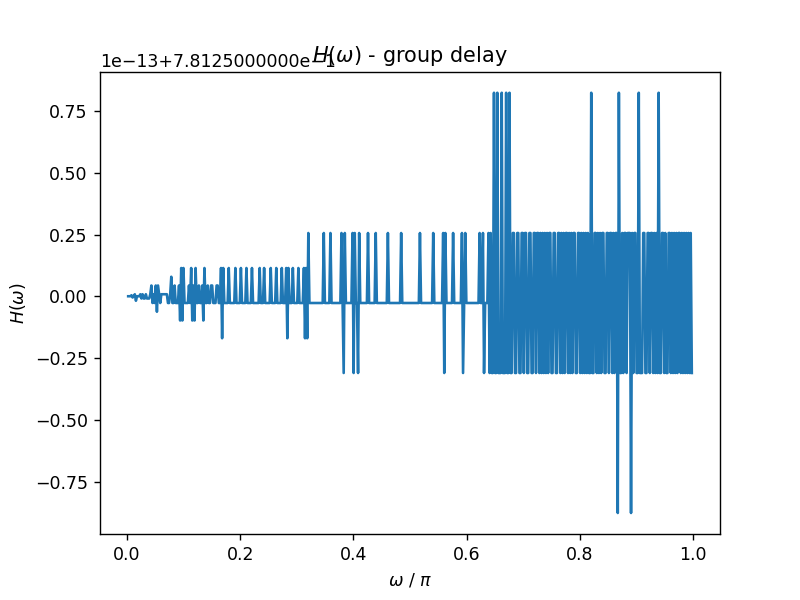

Text(0, 0.5, '$H(\\omega)$')

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sgnl
from scipy.fftpack import fft, ifft
%matplotlib notebook

#importing filter
Hw = loadmat('FIR-LPF1.mat')

filter_data = loadmat('LPF1.mat')
Coeffs = filter_data['ba'].astype(float)

b = Coeffs[:,0]
a = [1,1,1,1,1,1]

w,Hw = sgnl.freqz(b,1)

Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))

fig, (ax1,ax2) = plt.subplots(2)
ax1.plot(w/np.pi, Hw_mag)
ax2.plot(w/np.pi, Hw_phs)
plt.ylabel('degrees')
plt.xlabel('frequency x$\pi$ rad/sample')

tau_w=-np.diff(Hw_phs)*(N/(2*np.pi))

plt.figure() 
plt.plot(w[1:]/np.pi,tau_w) 
plt.title('$H(\omega) $ - group delay')
plt.xlabel('$\omega$ / $\pi$') 
plt.ylabel('$H(\omega)$') 

<IPython.core.display.Javascript object>


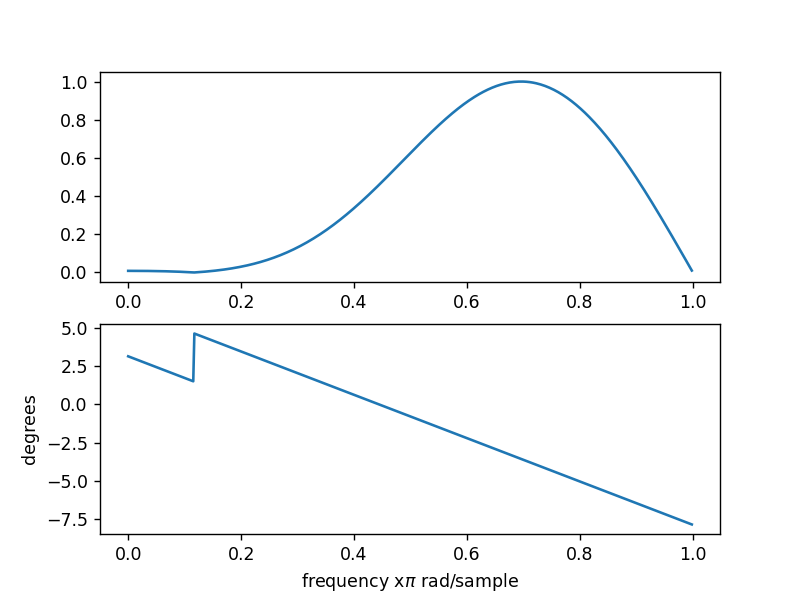

<IPython.core.display.Javascript object>


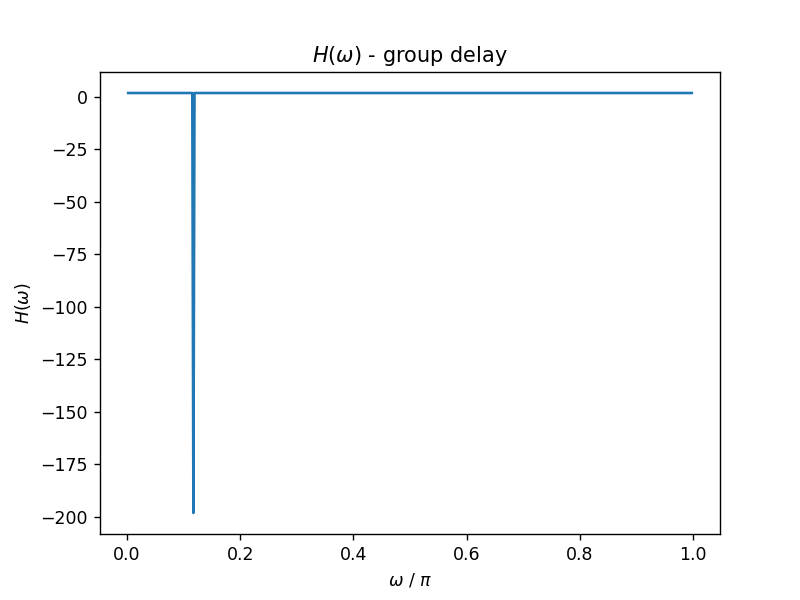

Text(0, 0.5, '$H(\\omega)$')

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sgnl
from scipy.fftpack import fft, ifft
%matplotlib notebook

#importing filter

filter_data = loadmat('FIR_BPF.mat')
Coeffs = filter_data['ba'].astype(float)

b = Coeffs[:,0]
a = [1,1,1,1,1,1]

w,Hw = sgnl.freqz(b,1)

Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))

fig, (ax1,ax2) = plt.subplots(2)
ax1.plot(w/np.pi, Hw_mag)
ax2.plot(w/np.pi, Hw_phs)
plt.ylabel('degrees')
plt.xlabel('frequency x$\pi$ rad/sample')

tau_w=-np.diff(Hw_phs)*(N/(2*np.pi))

plt.figure() 
plt.plot(w[1:]/np.pi,tau_w) 
plt.title('$H(\omega) $ - group delay')
plt.xlabel('$\omega$ / $\pi$') 
plt.ylabel('$H(\omega)$') 

## SORU-2

<IPython.core.display.Javascript object>


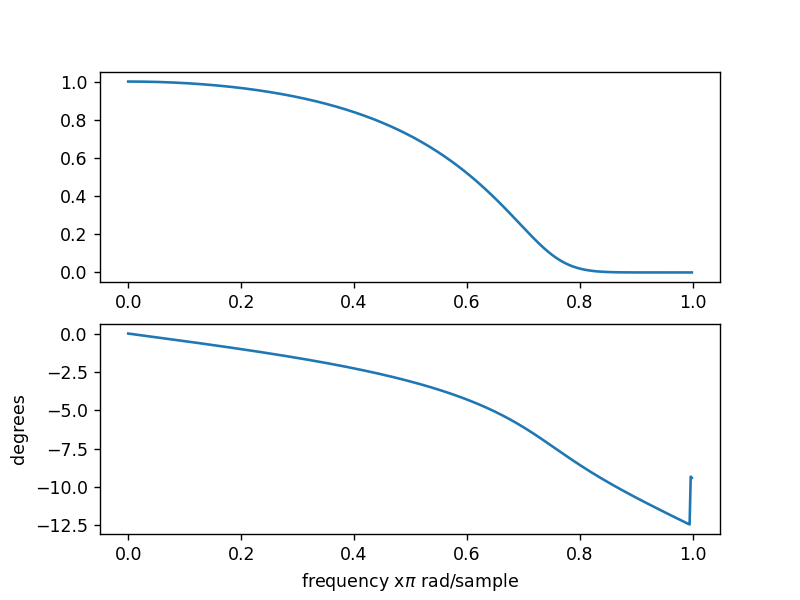

<IPython.core.display.Javascript object>


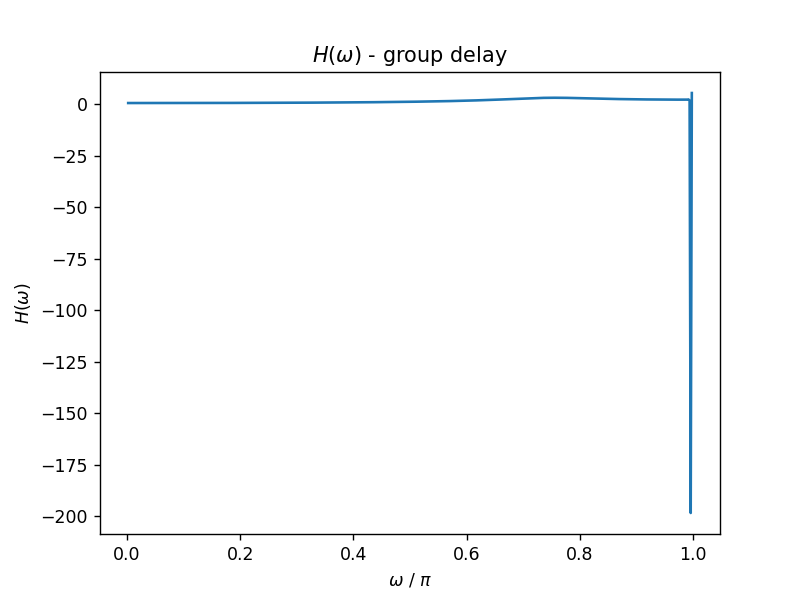

Text(0, 0.5, '$H(\\omega)$')

In [29]:
filter_data = loadmat('IIR-LPF1.mat')
Coeffs = filter_data['ba'].astype(float)

b = Coeffs[:,0]
a = Coeffs[:,1]

w,Hw = sgnl.freqz(b,a)

Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))

fig, (ax1,ax2) = plt.subplots(2)
ax1.plot(w/np.pi, Hw_mag)
ax2.plot(w/np.pi, Hw_phs)
plt.ylabel('degrees')
plt.xlabel('frequency x$\pi$ rad/sample')

tau_w=-np.diff(Hw_phs)*(N/(2*np.pi)) # grup gecikmesi faz cevabının türevi ile bulunur.

plt.figure() 
plt.plot(w[1:]/np.pi,tau_w) 
plt.title('$H(\omega) $ - group delay')
plt.xlabel('$\omega$ / $\pi$') 
plt.ylabel('$H(\omega)$') 

<IPython.core.display.Javascript object>


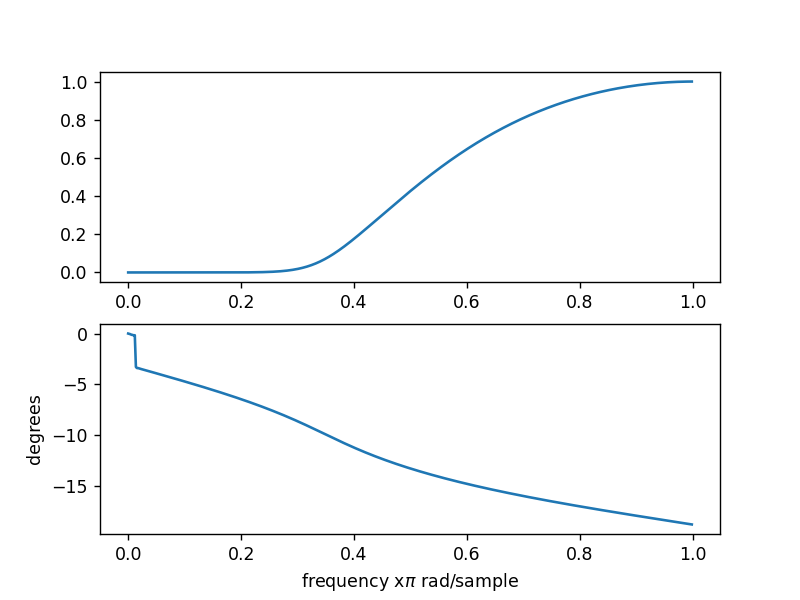

<IPython.core.display.Javascript object>


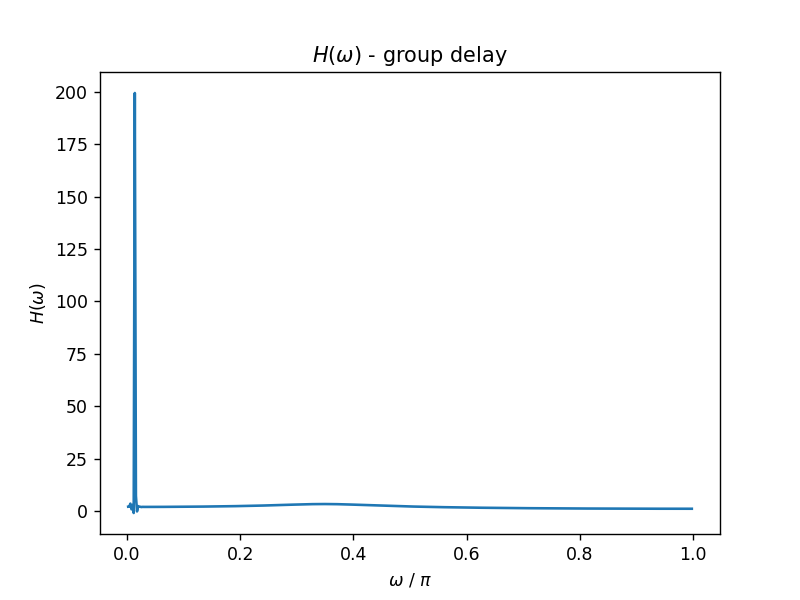

Text(0, 0.5, '$H(\\omega)$')

In [35]:
filter_data = loadmat('IIR_HPF.mat')
Coeffs = filter_data['ba'].astype(float)

b = Coeffs[:,0]
a = Coeffs[:,1]

w,Hw = sgnl.freqz(b,a)

Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))

fig, (ax1,ax2) = plt.subplots(2)
ax1.plot(w/np.pi, Hw_mag)
ax2.plot(w/np.pi, Hw_phs)
plt.ylabel('degrees')
plt.xlabel('frequency x$\pi$ rad/sample')

tau_w=-np.diff(Hw_phs)*(N/(2*np.pi)) # grup gecikmesi faz cevabının türevi ile bulunur.

plt.figure() 
plt.plot(w[1:]/np.pi,tau_w) 
plt.title('$H(\omega) $ - group delay')
plt.xlabel('$\omega$ / $\pi$') 
plt.ylabel('$H(\omega)$') 

#### Grup gecikmesi faz cevabının türevi ile bulunduğu için faz cevabı grafiğinde eğim değerlerine bakarak grup gecikmesi grafiklerinin doğruluğunu gözlemliyoruz

#### Frekans değerleri Pyfda üzerindeki grafiklere göre Python'da iki katı olarak gözüküyor. Bunun sebebi Pyfda Grafikleri 0-pi aralığında çizerken Python'da 0-2pi aralığında çiziliyor 